# Libraries and Data

In [ ]:
# # Mount Drive to access files
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# # Path to the folder
# %cd /content/drive/MyDrive/Python - Time Series Forecasting/Time Series Analysis/Introduction to Time Series Forecasting

/content/drive/MyDrive/Python - Time Series Forecasting/Time Series Analysis/Introduction to Time Series Forecasting


In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Load Amazon Stock Price data from 1997 to 2020
# Date - in format: yy-mm-dd
# Open - the price of the stock at market open
# High - Highest price reached in the day
# Low - Lowest price reached in the day
# Close - The stock closing at the end of the Market hours
# Adj Close - Is the closing price after adjustments for all applicable splits and dividend distributions
# Volume - Number of shares traded
# located at https://www.kaggle.com/datasets/salmanfaroz/amazon-stock-price-1997-to-2020
df = pd.read_csv('Amazon.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


# Time Series Index

In [3]:
# Convert 'Date' To a Datetime and set as index
df['Date'] = pd.to_datetime(df['Date'], format = "%Y-%m-%d")
df.set_index('Date', inplace = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [4]:
# Select the Amazon Data for 9 November 2017
df.loc['2017-11-09']

Open         1.125960e+03
High         1.129620e+03
Low          1.115770e+03
Close        1.129130e+03
Adj Close    1.129130e+03
Volume       3.732700e+06
Name: 2017-11-09 00:00:00, dtype: float64

In [5]:
# Another way to load the data and set the column 'Date' as index
df1 = pd.read_csv("Amazon.csv", index_col = "Date", parse_dates = True)
df1.index

DatetimeIndex(['1997-05-15', '1997-05-16', '1997-05-19', '1997-05-20',
               '1997-05-21', '1997-05-22', '1997-05-23', '1997-05-27',
               '1997-05-28', '1997-05-29',
               ...
               '2020-07-20', '2020-07-21', '2020-07-22', '2020-07-23',
               '2020-07-24', '2020-07-27', '2020-07-28', '2020-07-29',
               '2020-07-30', '2020-07-31'],
              dtype='datetime64[ns]', name='Date', length=5842, freq=None)

In [6]:
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [7]:
# Resampling to Weekly Frequency and calculate the mean values
df.resample('W').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-18,2.203125,2.239583,1.817708,1.843750,1.843750,43428000.0
1997-05-25,1.593750,1.627083,1.456250,1.533333,1.533333,11628240.0
1997-06-01,1.544271,1.583333,1.486979,1.529948,1.529948,4834800.0
1997-06-08,1.490625,1.560417,1.452083,1.520833,1.520833,3666960.0
1997-06-15,1.633333,1.658333,1.570833,1.600000,1.600000,2264880.0
...,...,...,...,...,...,...
2020-07-05,2761.270020,2829.247498,2732.552551,2802.049988,2802.049988,5237475.0
2020-07-12,3064.776025,3124.455957,3028.425977,3104.180029,3104.180029,5810080.0
2020-07-19,3080.070020,3125.204004,2971.649951,3031.747998,3031.747998,6379340.0


In [8]:
# Resampling to Monthly end Frequency and calculate the mean values
df.resample('M').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-31,1.686553,1.722538,1.533144,1.588542,1.588542,1.493967e+07
1997-06-30,1.547867,1.578373,1.503968,1.537698,1.537698,2.531600e+06
1997-07-31,2.168561,2.267045,2.104640,2.205492,2.205492,4.937018e+06
1997-08-31,2.222966,2.274306,2.154018,2.231399,2.231399,1.519371e+06
1997-09-30,3.424107,3.634921,3.283730,3.492560,3.492560,5.136286e+06
...,...,...,...,...,...,...
2020-03-31,1863.148626,1910.390004,1825.159096,1872.310436,1872.310436,7.445868e+06
2020-04-30,2216.111439,2256.839989,2185.934768,2228.705241,2228.705241,5.929157e+06
2020-05-31,2391.137012,2418.904004,2364.485498,2394.184021,2394.184021,4.130615e+06


In [9]:
# Resampling to Business Monthly end Frequency and calculate the mean values
df.resample('BM').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-30,1.686553,1.722538,1.533144,1.588542,1.588542,1.493967e+07
1997-06-30,1.547867,1.578373,1.503968,1.537698,1.537698,2.531600e+06
1997-07-31,2.168561,2.267045,2.104640,2.205492,2.205492,4.937018e+06
1997-08-29,2.222966,2.274306,2.154018,2.231399,2.231399,1.519371e+06
1997-09-30,3.424107,3.634921,3.283730,3.492560,3.492560,5.136286e+06
...,...,...,...,...,...,...
2020-03-31,1863.148626,1910.390004,1825.159096,1872.310436,1872.310436,7.445868e+06
2020-04-30,2216.111439,2256.839989,2185.934768,2228.705241,2228.705241,5.929157e+06
2020-05-29,2391.137012,2418.904004,2364.485498,2394.184021,2394.184021,4.130615e+06


In [10]:
# Resampling to Business Monthly start end Frequency and calculate the mean values
df.resample('BMS').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-01,1.686553,1.722538,1.533144,1.588542,1.588542,1.493967e+07
1997-06-02,1.547867,1.578373,1.503968,1.537698,1.537698,2.531600e+06
1997-07-01,2.168561,2.267045,2.104640,2.205492,2.205492,4.937018e+06
1997-08-01,2.222966,2.274306,2.154018,2.231399,2.231399,1.519371e+06
1997-09-01,3.424107,3.634921,3.283730,3.492560,3.492560,5.136286e+06
...,...,...,...,...,...,...
2020-03-02,1863.148626,1910.390004,1825.159096,1872.310436,1872.310436,7.445868e+06
2020-04-01,2216.111439,2256.839989,2185.934768,2228.705241,2228.705241,5.929157e+06
2020-05-01,2391.137012,2418.904004,2364.485498,2394.184021,2394.184021,4.130615e+06


Resample offset aliases:
- B = business day
- D = calendar day
- W = weekly
- M = month end
- BM = business month end
- MS = month start
- BMS = business month start
- Q = quarter end
- BQ = business quarter end
- QS = quarter start
- BQS = business quarter start
- A = year end
- BA = business year end
- AS = year start
- BAS = business year start
- h = hourly
- min = minutely
- s = secondly
- ms = milliseconds
- us = microseconds

Now we try to build a visualization to compare between them

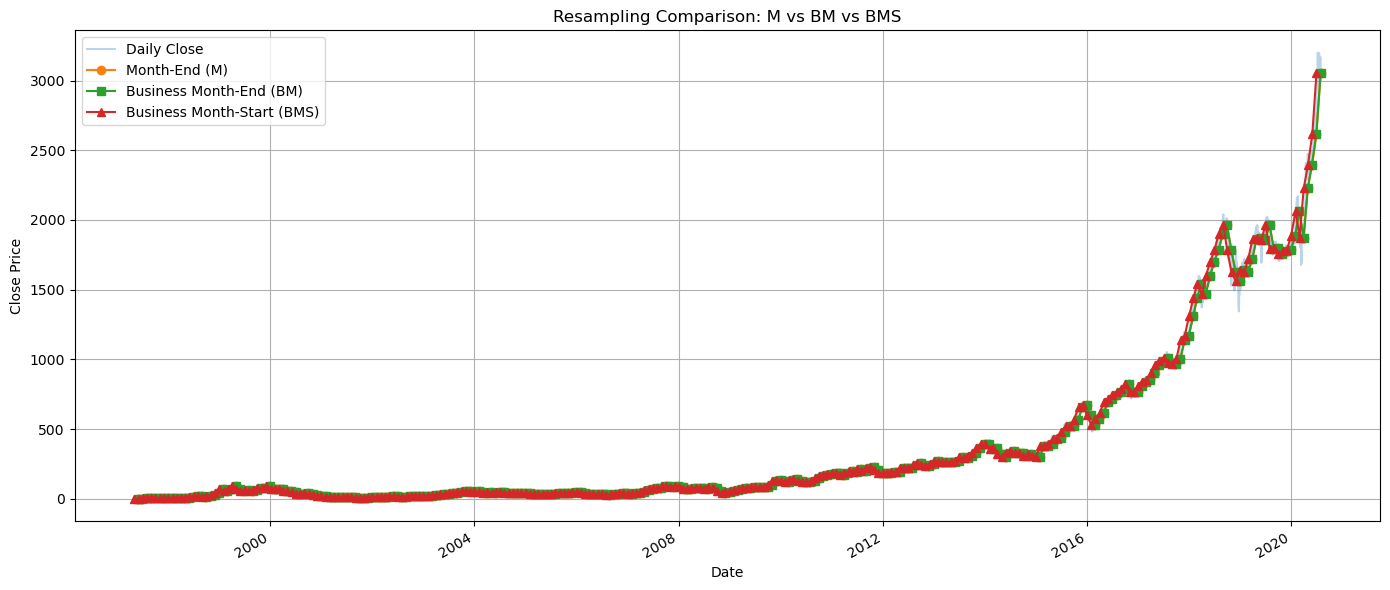

In [11]:
resample_M = df['Close'].resample('M').mean()
resample_BM = df['Close'].resample('BM').mean()
resample_BMS = df['Close'].resample('BMS').mean()

# Plot all resampled versions
plt.figure(figsize=(14, 6))
df['Close'].plot(alpha=0.3, label='Daily Close')
resample_M.plot(marker='o', label='Month-End (M)')
resample_BM.plot(marker='s', label='Business Month-End (BM)')
resample_BMS.plot(marker='^', label='Business Month-Start (BMS)')

plt.title('Resampling Comparison: M vs BM vs BMS')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

When we compare the 3, there is no obvious difference between them in term of data values but the difference is that:

M uses for calendar month's last day

BM Uses the last weekday of the month

BMS Uses the first weekday of the month

# Exploring Data

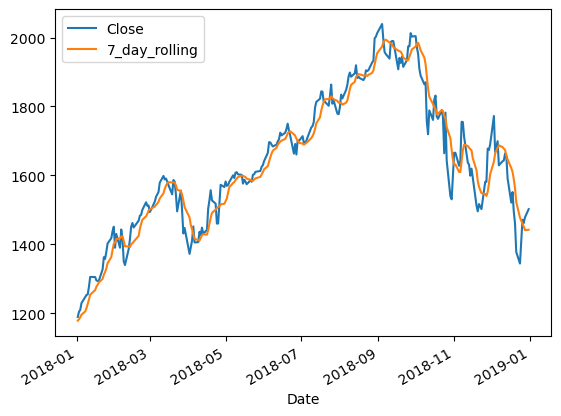

In [12]:
# Series.rolling() - create a rolling window calculation, to smooth time-series data and identify trends over time

# Create a new column for 7- Day rolling average of the closing price
df['7_day_rolling']= df['Close'].rolling(window = 7).mean()
# Plot both the rolling average and closing values
df[['Close', '7_day_rolling']].loc['2018'].plot()
plt.show()

There is a significant surge at around spetember 2018

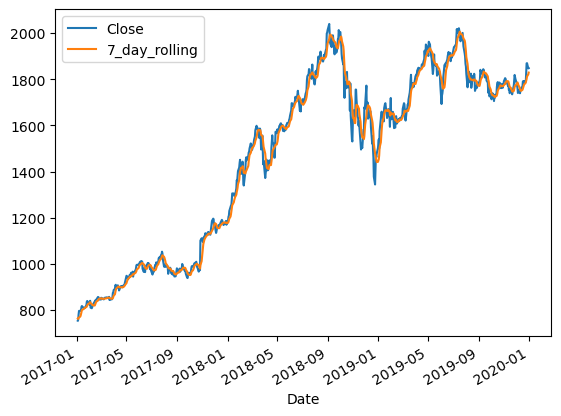

In [13]:
# Series.rolling() - create a rolling window calculation, to smooth time-series data and identify trends over time

# Create a new column for 7- Day rolling average of the closing price
df['7_day_rolling']= df['Close'].rolling(window = 7).mean()
# Plot both the rolling average and closing values
df[['Close', '7_day_rolling']].loc['2017':'2019'].plot()
plt.show()

When we expand the time, we can find it has occured in both spetember 2018 and spetember 2019 which could be the reason of the reports of the 3rd-quartile (Q3), after some searching it was due to financial performance in the preceding quarters. For instance, in the third quarter of 2018, Amazon reported a year-over-year revenue growth of 29%, operating income growth of 966%, and earnings per share growth of 1,006%. Also, in September 2018, Amazon's stock experienced significant growth, reaching a market capitalization of $1 trillion on September 4, making it the second U.S. company to achieve this milestone after Apple. Which confirms our initial hypothesis

In [14]:
# Series.idxmax() - To identify the index of the maximum value in a Series.
# Find out the month with highest closing average
df.resample('M').mean()['Close'].idxmax()

Timestamp('2020-07-31 00:00:00', freq='M')

In [15]:
df

,Open,High,Low,Close,Adj Close,Volume,7_day_rolling
Date,,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,NaN
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,NaN
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,NaN
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,NaN
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,NaN
...,...,...,...,...,...,...,...
2020-07-27,3062.000000,3098.000000,3015.770020,3055.209961,3055.209961,4170500,3063.954276
2020-07-28,3054.270020,3077.090088,2995.760010,3000.330078,3000.330078,3126700,3069.434291
2020-07-29,3030.989990,3039.159912,2996.770020,3033.530029,3033.530029,2974100,3046.104283


In [16]:
df.resample('M').mean()

,Open,High,Low,Close,Adj Close,Volume,7_day_rolling
Date,,,,,,,
1997-05-31,1.686553,1.722538,1.533144,1.588542,1.588542,1.493967e+07,1.546726
1997-06-30,1.547867,1.578373,1.503968,1.537698,1.537698,2.531600e+06,1.537734
1997-07-31,2.168561,2.267045,2.104640,2.205492,2.205492,4.937018e+06,2.085836
1997-08-31,2.222966,2.274306,2.154018,2.231399,2.231399,1.519371e+06,2.241249
1997-09-30,3.424107,3.634921,3.283730,3.492560,3.492560,5.136286e+06,3.222187
...,...,...,...,...,...,...,...
2020-03-31,1863.148626,1910.390004,1825.159096,1872.310436,1872.310436,7.445868e+06,1872.170246
2020-04-30,2216.111439,2256.839989,2185.934768,2228.705241,2228.705241,5.929157e+06,2163.296801
2020-05-31,2391.137012,2418.904004,2364.485498,2394.184021,2394.184021,4.130615e+06,2390.072586


In [17]:
# # Series.pct_change() - calculate the percentage change from the previous row
# # Create a new column for closing daily return (percentage change in the price from one day to the next)
df['daily_returns'] = df['Close'].pct_change() * 100

In [18]:
# # Days with more than 10% change in closing price
df[abs(df['daily_returns']) > 10].head()

,Open,High,Low,Close,Adj Close,Volume,7_day_rolling,daily_returns
Date,,,,,,,,
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,NaN,-11.702131
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,NaN,-12.738849
1997-07-03,1.598958,1.916667,1.593750,1.911458,1.911458,12577200,1.581101,20.327874
1997-07-08,2.041667,2.333333,2.041667,2.302083,2.302083,15517200,1.764137,15.104163
1997-07-10,2.333333,2.572917,2.333333,2.562500,2.562500,9051600,2.029018,10.313898


In [19]:
df[abs(df['daily_returns']) > 10].count()

Open             164
High             164
Low              164
Close            164
Adj Close        164
Volume           164
7_day_rolling    162
daily_returns    164
dtype: int64

In [20]:
(df['daily_returns'].abs() > 10).sum()

164

We can find that there is around 164 days that had more than 10 percent return

# Data Visualization

In [21]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,7_day_rolling,daily_returns
Date,,,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,NaN,NaN
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,NaN,-11.702131
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,NaN,-1.204815
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,NaN,-4.268297
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,NaN,-12.738849


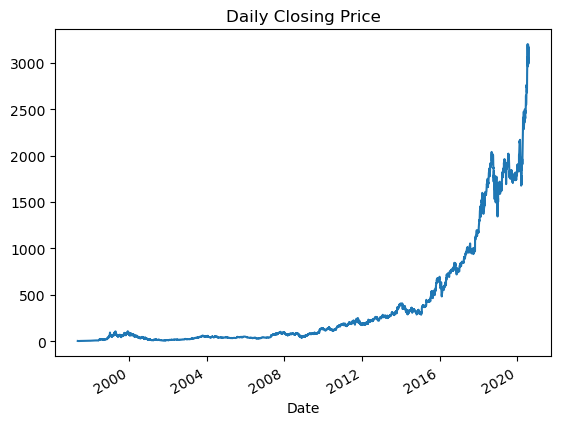

In [22]:
# Daily Closing Price Plot
df['Close'].plot(title = 'Daily Closing Price')
plt.show()

We find that there was always an increassing from the values from 1997 to 2022, with a big change comes at around 2018 with a value of \\$2000 and it continue at 2020 with a value of \\$3000

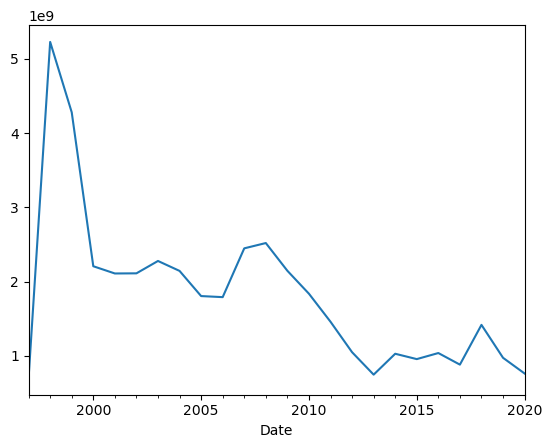

In [23]:
# Plot the Yearly Volume
df.resample('Y').sum()['Volume'].plot()
plt.show()

We can see that at first there was a huge volume trade, and it can be due that at first the price of the stocks were cheap, and as amazon growth the price is up which makes the trading volume is down and many investors would want to hold to their shares 

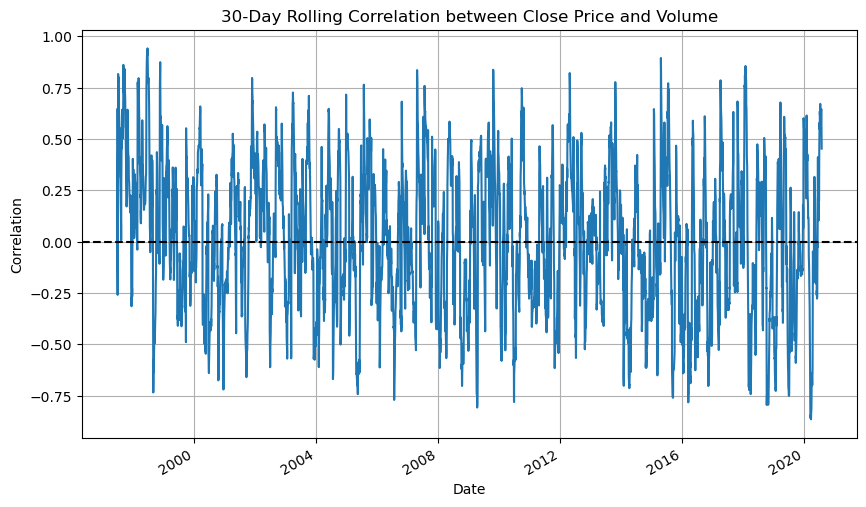

In [24]:
rolling_corr = df['Close'].rolling(window=30).corr(df['Volume'])

# Plot
plt.figure(figsize=(10,6))
rolling_corr.plot()
plt.title('30-Day Rolling Correlation between Close Price and Volume')
plt.axhline(0, color='black', linestyle='--')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

When we try to draw the correlation with 30-days window, we find it fluctuating between 1 and -1 by date, this chnages could be due to other dimensions like news and market sentiment 

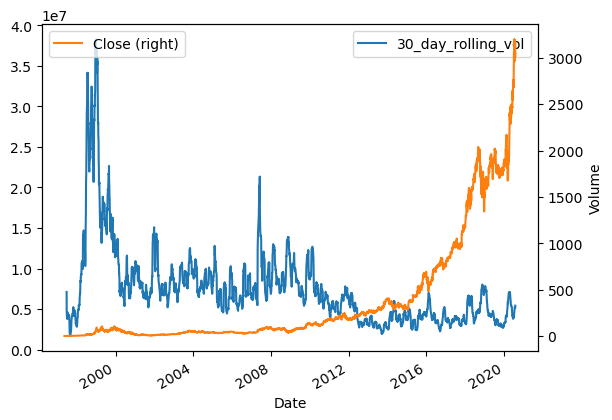

In [25]:
# # Create a new column for 30- Day rolling average of the volume
df['30_day_rolling_vol'] = df['Volume'].rolling(window = 30).mean()

# # Plotting Closing Price and 30-day rolling Volume
df['30_day_rolling_vol'].plot(legend = True)
#ax = df['Close'].plot(secondary_y = True, legend = True)
ax = df['Close'].plot(secondary_y = True)
plt.legend()
ax.set_ylabel('Volume')
plt.show()

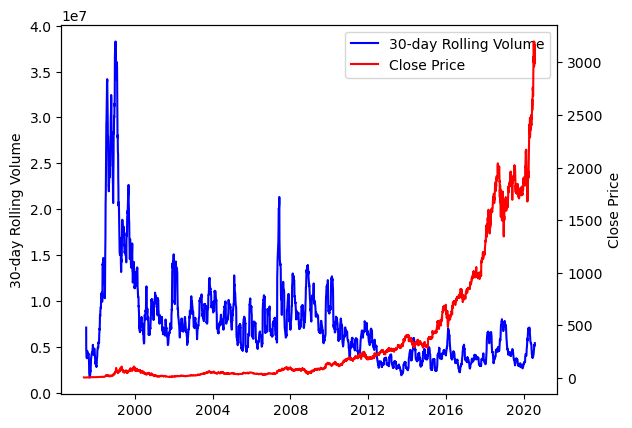

In [26]:
df['30_day_rolling_vol'] = df['Volume'].rolling(window=30).mean()

fig, ax1 = plt.subplots()
line1, = ax1.plot(df.index, df['30_day_rolling_vol'], label='30-day Rolling Volume', color='blue')
ax1.set_ylabel('30-day Rolling Volume')

ax2 = ax1.twinx()
line2, = ax2.plot(df.index, df['Close'], label='Close Price', color='red')
ax2.set_ylabel('Close Price')
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels)
plt.show()


In [27]:
# # There's a weak negative correlation between the 30-day rolling Volume and the Closing Price
df[['Close', '30_day_rolling_vol']].corr()

,Close,30_day_rolling_vol
Close,1.000000,-0.341083
30_day_rolling_vol,-0.341083,1.000000


We can see from the corr function that is weak negative correlation and we can see that the volume was between 35 and 40 millions shares being traded at he highest point  

# Data Manipulation

In [28]:
# Identify missing values
df.isnull().sum()

Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
7_day_rolling          6
daily_returns          1
30_day_rolling_vol    29
dtype: int64

The nulls values are due to the interpetation that we do

In [29]:
# Extract Time Variables
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.day_name()
df['weekday_numeric'] = df.index.weekday

# 5 & 6 is for Saturday and Sunday
df['is_weekend'] = df.index.weekday > 4

df.head()

,Open,High,Low,Close,Adj Close,Volume,7_day_rolling,daily_returns,30_day_rolling_vol,year,month,day,weekday,weekday_numeric,is_weekend
Date,,,,,,,,,,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,NaN,NaN,NaN,1997,5,15,Thursday,3,False
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,NaN,-11.702131,NaN,1997,5,16,Friday,4,False
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,NaN,-1.204815,NaN,1997,5,19,Monday,0,False
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,NaN,-4.268297,NaN,1997,5,20,Tuesday,1,False
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,NaN,-12.738849,NaN,1997,5,21,Wednesday,2,False


In [30]:
## Feature Engineering - Lagged values

# Series.shift(1) - each value is moved to the row below its current position
# Purpose on stock price prediction: Using yesterday's price to help predict today's

# Create 2 new columns for lagged values 1 and 2
df['closed_lag1'] = df['Close'].shift(1)
df['closed_lag2'] = df['Close'].shift(2)
df['closed_lag50'] = df['Close'].shift(50)

<Axes: xlabel='Date'>

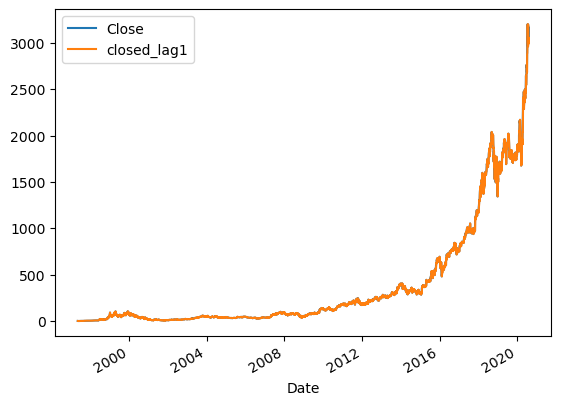

In [31]:
df[['Close', 'closed_lag1']].plot()

In [32]:
df[['Close', 'closed_lag1']].corr()

,Close,closed_lag1
Close,1.000000,0.999712
closed_lag1,0.999712,1.000000


<Axes: xlabel='Date'>

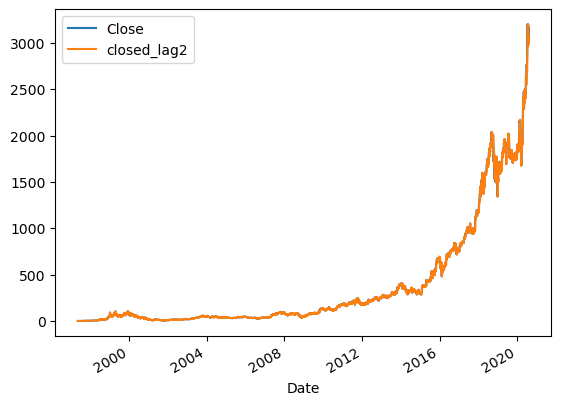

In [33]:
df[['Close', 'closed_lag2']].plot()

In [34]:
df[['Close', 'closed_lag2']].corr()

,Close,closed_lag2
Close,1.000000,0.999466
closed_lag2,0.999466,1.000000


<Axes: xlabel='Date'>

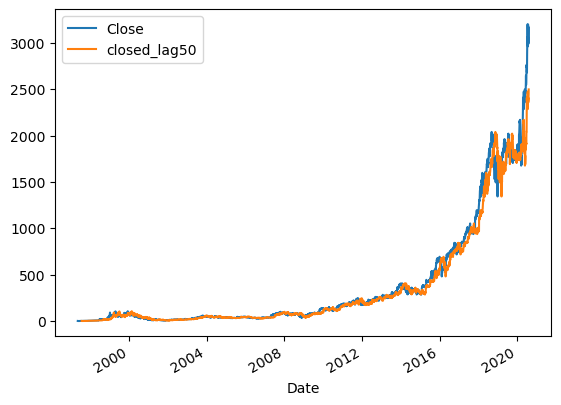

In [35]:
df[['Close', 'closed_lag50']].plot()

In [36]:
df[['Close', 'closed_lag50']].corr()

,Close,closed_lag50
Close,1.000000,0.989238
closed_lag50,0.989238,1.000000


In [37]:
df.resample('M')['Close'].mean()

Date
1997-05-31       1.588542
1997-06-30       1.537698
1997-07-31       2.205492
1997-08-31       2.231399
1997-09-30       3.492560
                 ...     
2020-03-31    1872.310436
2020-04-30    2228.705241
2020-05-31    2394.184021
2020-06-30    2613.545455
2020-07-31    3053.853183
Freq: M, Name: Close, Length: 279, dtype: float64

# Seasonality

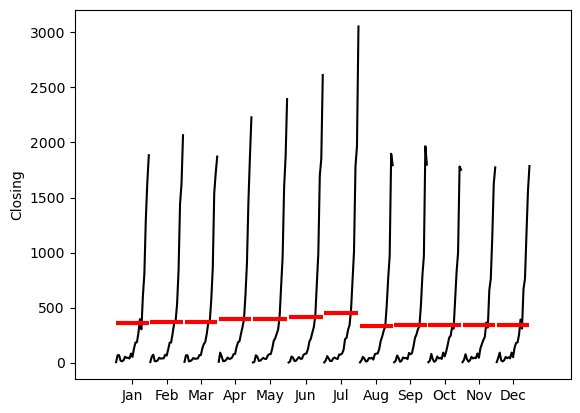

In [38]:
# month_plot() - To visualize the average value for each month across multiple years in a time series
# red lines - Represents the mean value for each month

# Plotting the monthly seasonality of closing values
month_plot(df['Close'].resample('M').mean(),
           ylabel = 'Closing')
plt.show()

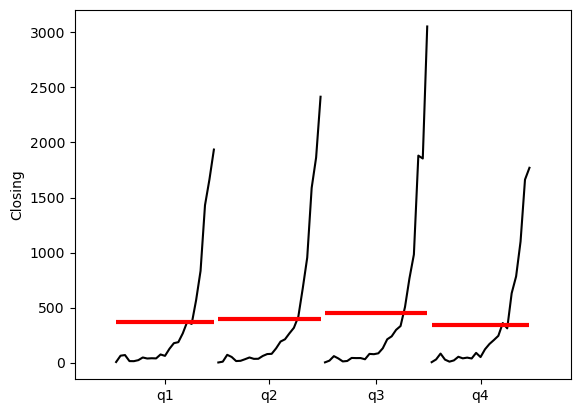

In [39]:
# quarter_plot() - To visualize seasonal patterns at a quarterly level.
# Q1 (january, february, march), Q2 (april, may, june), Q3 (july, august, september), Q4 (october, november, december)

# Plotting the quarterly seasonality of closing values
quarter_plot(df['Close'].resample('Q').mean(),
           ylabel = 'Closing')
plt.show()

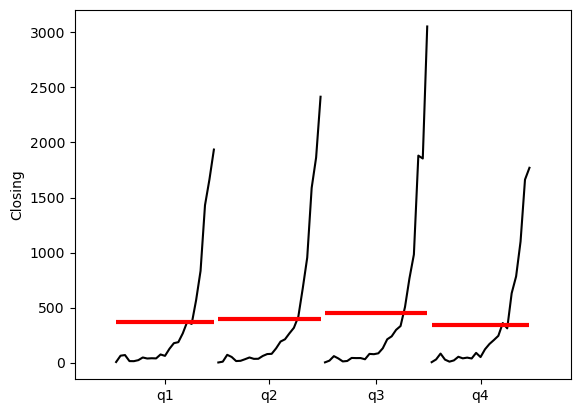

In [40]:
# quarter_plot() - To visualize seasonal patterns at a quarterly level.
# Q1 (january, february, march), Q2 (april, may, june), Q3 (july, august, september), Q4 (october, november, december)

# Plotting the quarterly seasonality of closing values
quarter_plot(df['Close'].resample('Q').mean(),
           ylabel = 'Closing')
plt.show()

This was another dataset that I do not have so I will use it as a comparison

In [53]:
# Load data of chocolate monthly revenue
df_choco = pd.read_csv("choco_monthly_revenue.csv", index_col = 0, parse_dates = True)
df_choco.head()

,revenue
Month with Year,
2018-01-01,1458
2018-02-01,1102
2018-03-01,1584
2018-04-01,1676
2018-05-01,1461


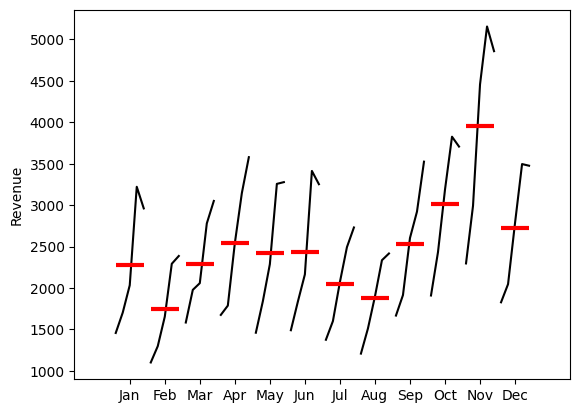

In [ ]:
# Plotting the monthly seasonality of revenue
month_plot(df_choco['revenue'],
           ylabel = 'Revenue')
plt.show()

`seasonal_decompose` - To decompose a time series into its constituent parts to better understand the underlying patterns.

components

- Trend: The overall direction of the series (increasing, decreasing, or stable).
- Seasonal: Repeating patterns at fixed intervals (e.g., daily, weekly, monthly).
- Residual: The remaining variation after removing trend and seasonal components.

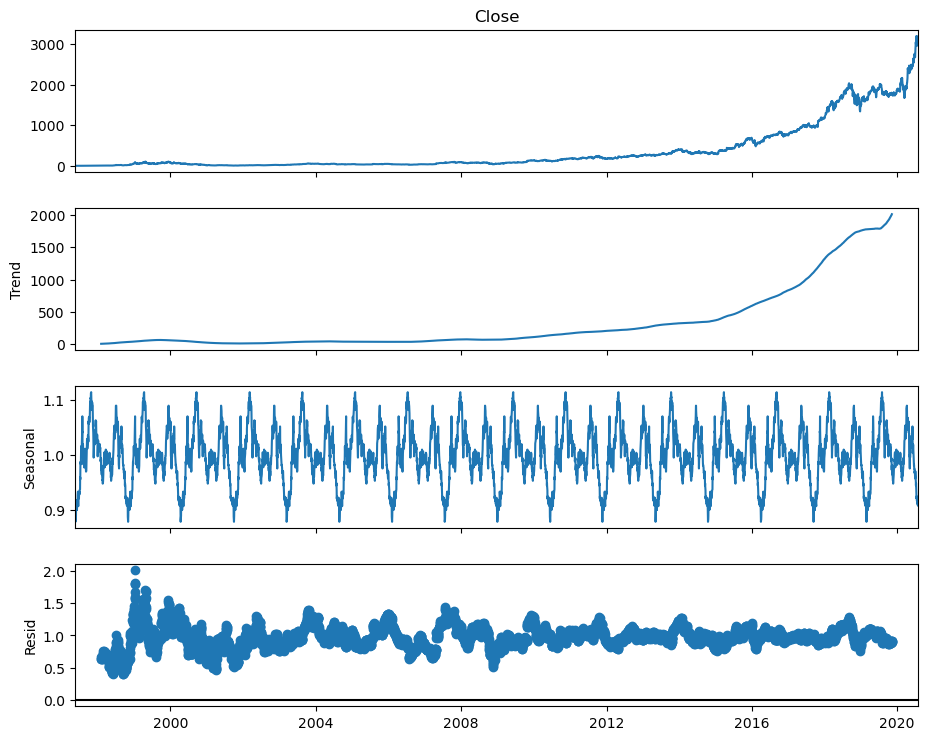

In [41]:
# Seasonal Decomposition Plots for Amazon Data
# Multiplicative model type, and daily (365) period
decomposition = seasonal_decompose(df['Close'],
                                   model = 'mul',
                                   period = 365)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

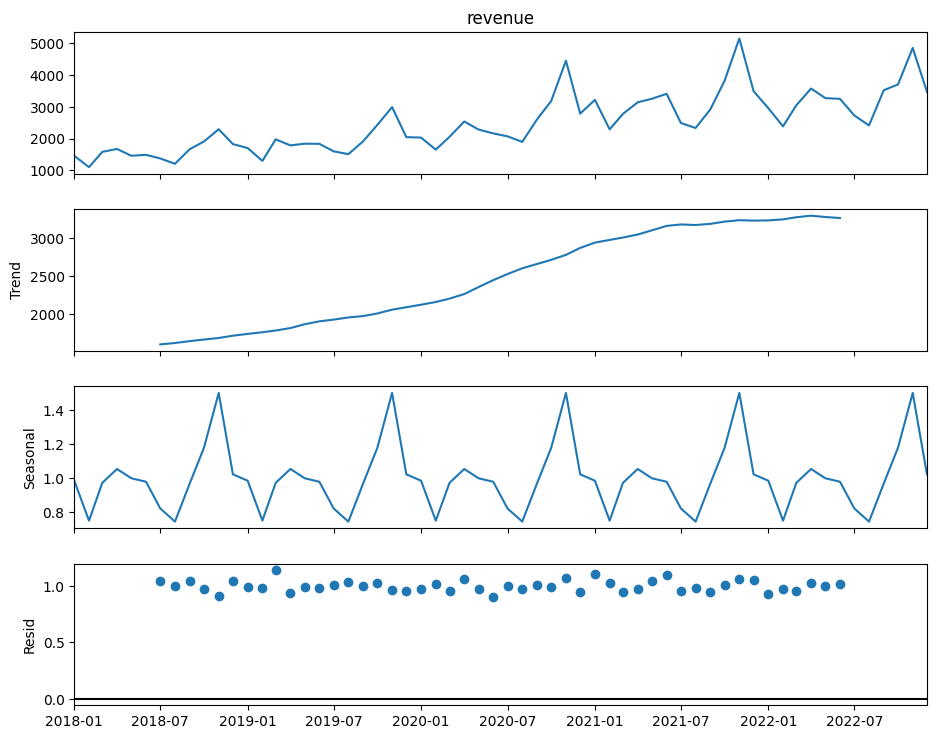

In [ ]:
# Seasonal Decomposition Plots for Chocolate Revenue Data
# Multiplicative model type, and monthly (12) period
decomposition = seasonal_decompose(df_choco['revenue'],
                                   model = 'mul',
                                   period = 12)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

We can see that for both the trend is upward, however the chclate trend is going up from the middle while amazon is at the last part has a sharp trend upwards

In amazon the seson has some noises and it is clutteres while he chocalate is clear 

Seasonality:
* 24 for hourly
* 7 or 365 for daily, but 7 is preferred for modeling
* 52 for weekly
* 12 for monthly
* 4 for quarterly
* 5 for weekdays

# Auto-Correlation

Autocorrelation measures the correlation between a time series and a lagged version of itself.

Purpose: To identify patterns or repeating cycles in a time series dataset.

Interpretation:
- Values range from -1 to 1.
- 1 indicates perfect positive correlation.
- -1 indicates perfect negative correlation.
- 0 indicates no correlation.

ACF Plot:
- X-axis: Lag periods
- Y-axis: Correlation coefficient

Key Features:
- At lag 0, autocorrelation is always 1 (a series is perfectly correlated with itself).
- Significant spikes at certain lags indicate repeating patterns.




In [42]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,7_day_rolling,daily_returns,30_day_rolling_vol,year,month,day,weekday,weekday_numeric,is_weekend,closed_lag1,closed_lag2,closed_lag50
Date,,,,,,,,,,,,,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,NaN,NaN,NaN,1997,5,15,Thursday,3,False,NaN,NaN,NaN
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,NaN,-11.702131,NaN,1997,5,16,Friday,4,False,1.958333,NaN,NaN
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,NaN,-1.204815,NaN,1997,5,19,Monday,0,False,1.729167,1.958333,NaN
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,NaN,-4.268297,NaN,1997,5,20,Tuesday,1,False,1.708333,1.729167,NaN
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,NaN,-12.738849,NaN,1997,5,21,Wednesday,2,False,1.635417,1.708333,NaN


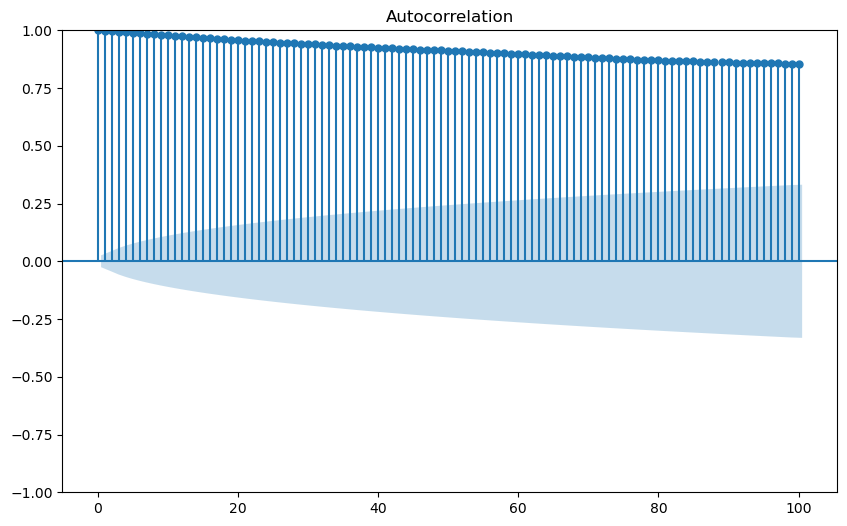

In [46]:
# Plot the autocorrelation (ACF) of the bitcoin closing values
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df['Close'], lags = 100, ax = ax)
plt.show()

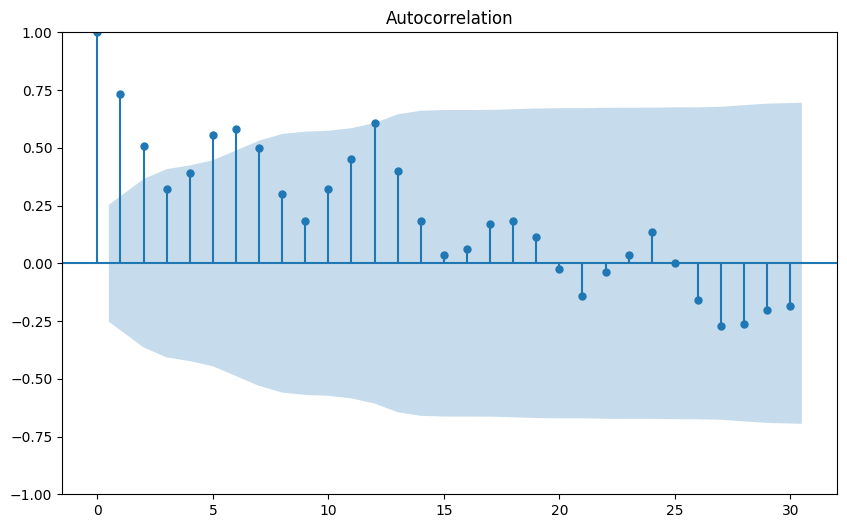

In [61]:
# Plot the autocorrelation (ACF) of the chocolate revenue values
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df_choco['revenue'], lags = 30, ax = ax)
plt.show()

We can see that Amazon has clear relation between them 

# Partial Auto-correlation

PACF measures the correlation between a time series and its lag, after removing the effects of all shorter lags.

Purpose: To identify the direct relationship between an observation and its lag, without intermediate effects.

Main Difference between ACF and PACF:
- ACF: Measures overall correlation at each lag, including indirect effects.
- PACF: Measures direct correlation at each lag, excluding indirect effects.

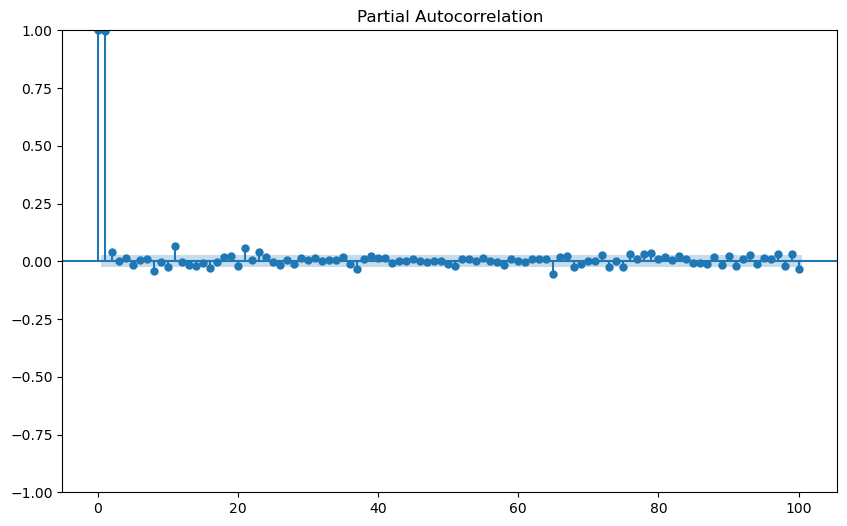

In [47]:
# Plot the partial autocorrelation (PACF) of the bitcoin closing values
fig, ax = plt.subplots(figsize = (10,6))
plot_pacf(df['Close'], lags = 100, ax = ax)
plt.show()

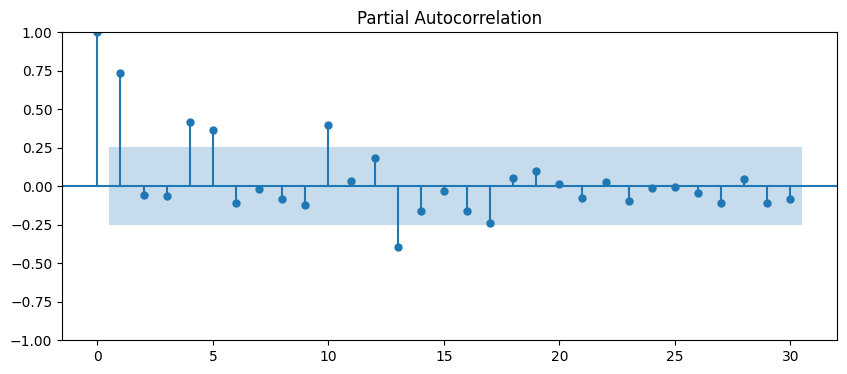

In [59]:
# Plot the partial autocorrelation (PACF) of the chocolate revenue values
fig, ax = plt.subplots(figsize = (10,4))
plot_pacf(df_choco['revenue'], lags = 30, ax = ax)
plt.show()

Here in partial it has a clear relation for amazon